# <center> Contour

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

   
def image_plot_multiple(title,image): ## display function
    L=len(title)
    ncols=min(L,3)
    nrows=int(np.ceil(L/ncols))
    plt.subplots(nrows,ncols,figsize=(7*ncols,nrows*5))
    for i,item in enumerate(title):
        plt.subplot(nrows,ncols,i+1)
        plt.imshow(cv2.cvtColor(image[i],cv2.COLOR_BGR2RGB))
        plt.title(title[i])

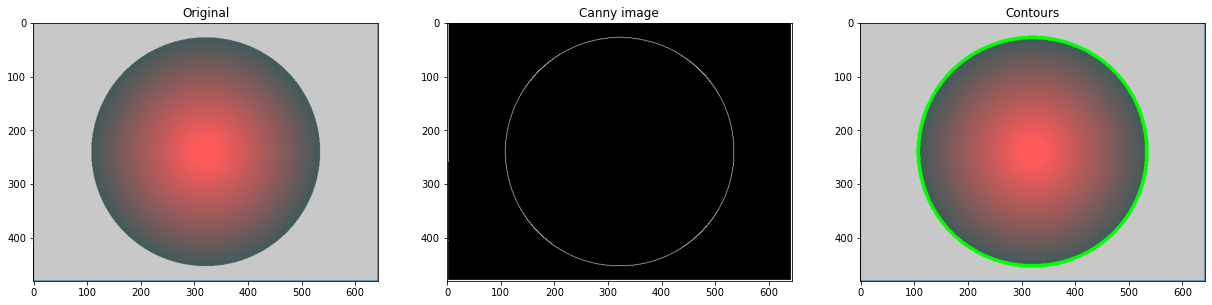

In [2]:
im_path=os.path.join('images','grad.png' )
im=cv2.imread(im_path)
image_con=np.copy(im)
image_gray=cv2.cvtColor(image_con,cv2.COLOR_BGR2GRAY)
canny= cv2.Canny(image_gray, 30, 120)
kernel=np.ones((3,3),np.uint8)
canny=cv2.morphologyEx(canny,cv2.MORPH_CLOSE,kernel,iterations=2)
contours = cv2.findContours(canny, 
                            cv2.RETR_LIST,
                            cv2.CHAIN_APPROX_NONE)
cv2.drawContours(im, contours[0][1], -1, (0,255,0), thickness = 5)
image_plot_multiple(['Original','Canny image','Contours'],[image_con, canny,im])

120
204


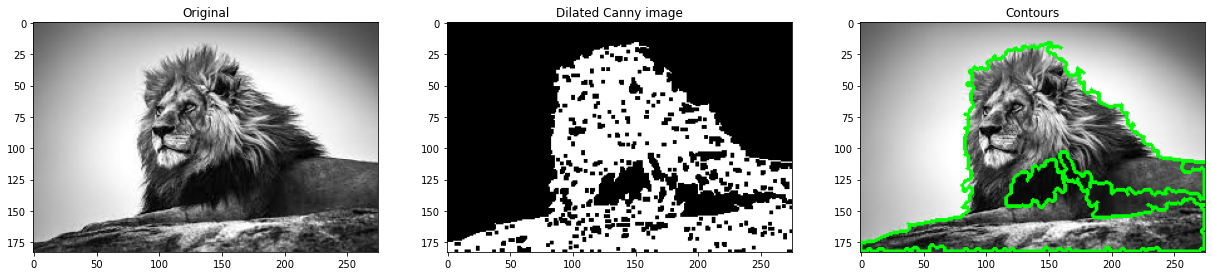

In [3]:
# finding contour area and drawing only certain numbers of contours

lion_path=os.path.join('images','lion.jpeg' )
lion=cv2.imread(lion_path)
image_con=np.copy(lion)
image_gray=cv2.cvtColor(image_con,cv2.COLOR_BGR2GRAY)
canny= cv2.Canny(image_gray, 30, 120)
kernel=np.ones((3,3),np.uint8)
canny=cv2.morphologyEx(canny,cv2.MORPH_CLOSE,kernel,iterations=1)
contours = cv2.findContours(canny, 
                            cv2.RETR_LIST,
                            cv2.CHAIN_APPROX_NONE)
cvArea=[]
for i in range(len(contours[0])):
    cvArea.append(cv2.contourArea(contours[0][i]))

for i in range(len(contours[0])):
    if cv2.contourArea(contours[0][i])>=2*np.mean(cvArea):
        print (i)
        cv2.drawContours(lion, contours[0][i], -1, (0,255,0), thickness = 2)
image_plot_multiple(['Original','Dilated Canny image','Contours'],[image_con, canny,lion])

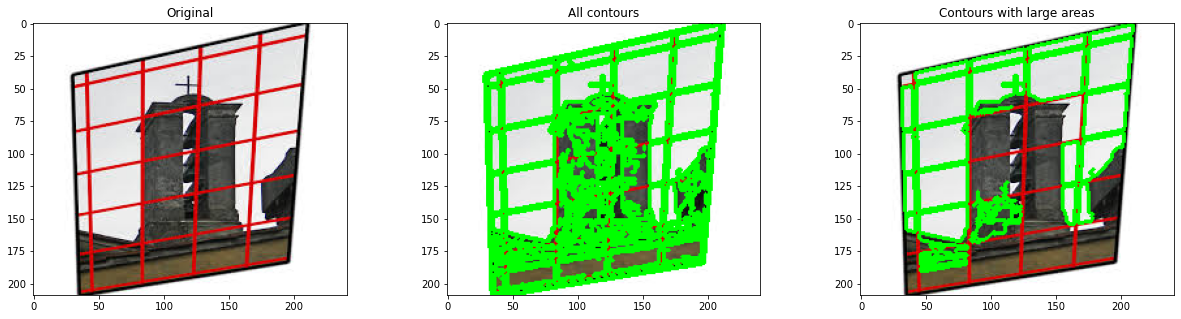

In [4]:
image1=os.path.join('images','perspective.jpeg')
persepective=cv2.imread(image1)

image_con=np.copy(persepective)
image_con1=np.copy(persepective)
image_gray=cv2.cvtColor(image_con,cv2.COLOR_BGR2GRAY)
canny= cv2.Canny(image_gray, 30, 120)
contours = cv2.findContours(canny, 
                            cv2.RETR_LIST,
                            cv2.CHAIN_APPROX_NONE)
cvArea=[]
for i in range(len(contours[0])):
    cvArea.append(cv2.contourArea(contours[0][i]))
cv2.drawContours(image_con1, contours[0], -1, (0,255,0), thickness = 2)
for i in range(len(contours[0])):
    if cv2.contourArea(contours[0][i])>np.mean(cvArea):
        cv2.drawContours(persepective, contours[0][i], -1, (0,255,0), thickness = 2)
image_plot_multiple(['Original','All contours','Contours with large areas'],[image_con, image_con1,persepective])

# <center> Finding convex hull

(10, 2) <class 'numpy.ndarray'>


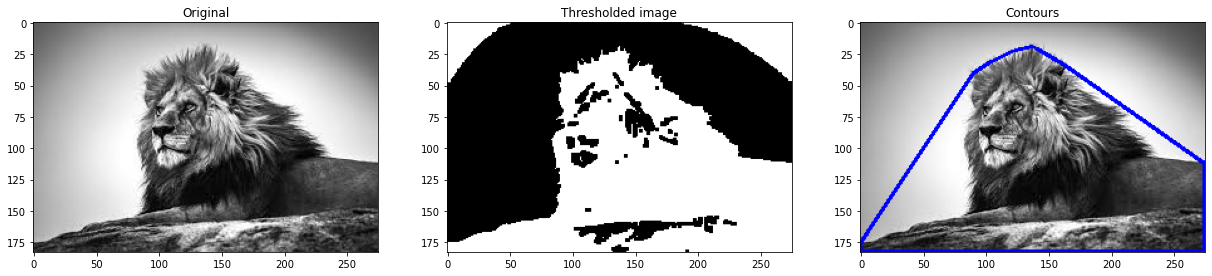

In [5]:
lion_path=os.path.join('images','lion.jpeg' )
lion=cv2.imread(lion_path)
image_con=np.copy(lion)
image_gray=cv2.cvtColor(image_con,cv2.COLOR_BGR2GRAY)
ret, result = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
thres=cv2.morphologyEx(result,cv2.MORPH_CLOSE,kernel,iterations=1)
contours = cv2.findContours(thres, 
                            cv2.RETR_LIST,
                            cv2.CHAIN_APPROX_SIMPLE)
cvArea=[]
for i in range(len(contours[0])):
    cvArea.append(cv2.contourArea(contours[0][i]))

for i in range(len(contours[0])):
    if cv2.contourArea(contours[0][i])>=2*np.mean(cvArea):
        hull = cv2.convexHull(contours[0][i])
        cv2.drawContours(image_con, [hull], -1, (255, 0, 0), 2)
        print(np.squeeze(hull).shape, type(np.squeeze(hull)))
image_plot_multiple(['Original','Thresholded image','Contours'],[lion, thres,image_con])


In [6]:
print(np.squeeze(hull))

[[141  21]
 [163  34]
 [274 112]
 [274 182]
 [  0 182]
 [  0 175]
 [ 90  40]
 [104  31]
 [123  22]
 [137  19]]


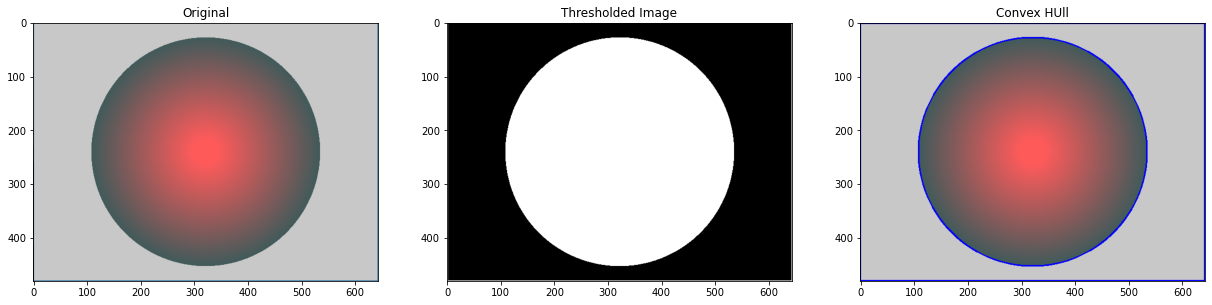

In [7]:
image=cv2.imread(os.path.join('images','grad.png'))
image_con=np.copy(image)
image_gray=cv2.cvtColor(image_con,cv2.COLOR_BGR2GRAY)
ret, result = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
thres=cv2.morphologyEx(result,cv2.MORPH_CLOSE,kernel,iterations=1)
contours = cv2.findContours(thres, 
                            cv2.RETR_LIST,
                            cv2.CHAIN_APPROX_NONE)
contour=contours[0]
for i in range(len(contour)):
        hull = cv2.convexHull(contours[0][i])
        cv2.drawContours(image_con, [hull], -1, (255, 0, 0), 2)
image_plot_multiple(['Original','Thresholded Image','Convex HUll'],[image, thres,image_con])

In [8]:
print(np.squeeze(hull).shape, type(np.squeeze(hull)))

(4, 2) <class 'numpy.ndarray'>


In [9]:
print(np.squeeze(hull))

[[642   0]
 [642 480]
 [  0 480]
 [  0   0]]


# <center> Thank you